## Observations and Insights 

In [114]:
print("observations:")
print("1. Median tumor volume for mice treated with Ramicane or Capomulin was significantly lower that for those treated with Infubinole or Ceftamin")
print("2. Ramicane had the lowest mean and median tumor volume of any drug regimen measured for the duration of the data")
print("3. Of the four promising drug regimens examined in this analysis, only one mouse, which was treated with Infubinole, had a an average final tumor volume considered an outlier. The tumor volume was lower than 1.5 x IQR.")


observations:
1. Median tumor volume for mice treated with Ramicane or Capomulin was significantly lower that for those treated with Infubinole or Ceftamin
2. Ramicane had the lowest mean and median tumor volume of any drug regimen measured for the duration of the data
3. Of the four promising drug regimens examined in this analysis, only one mouse, which was treated with Infubinole, had a an average final tumor volume considered an outlier. The tumor volume was lower than 1.5 x IQR.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df=pd.merge(mouse_metadata,study_results)
# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
check_duplicates=combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
check_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=combined_df.loc[908:917]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
print(combined_df.loc[combined_df["Mouse ID"] == "g989"])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_df[~combined_df["Mouse ID"].str.contains("g989")]
clean_data.shape


(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_s=pd.Series(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(),name="Mean")
median_s=pd.Series(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),name="Median")
var_s=pd.Series(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].apply(np.var),name="Variance")
std_s=pd.Series(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].apply(np.std),name="Std Deviation")
sem_s=pd.Series(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem(),name="SEM")
summary_df=pd.concat([mean_s,median_s,var_s,std_s,sem_s],axis=1)
summary_df


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_df2=clean_data.groupby(["Drug Regimen"]).agg(
    mean=("Tumor Volume (mm3)",'mean'),
    median=("Tumor Volume (mm3)", 'median'),
    variance=("Tumor Volume (mm3)",'var'),
    std_dev=("Tumor Volume (mm3)",'std'),
    sem=("Tumor Volume (mm3)",'sem'))
summary_df2=summary_df2.rename(columns={"mean":"Mean","median":"Median","variance":"Variance","std_dev":"Std Deviation","sem":"SEM"})
summary_df2


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
drug_names=clean_data.groupby(["Drug Regimen"])["Drug Regimen"].unique()
drug_names.index.values

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [10]:
clean_data.groupby(["Drug Regimen"])["Mouse ID"].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='No. Mice'>

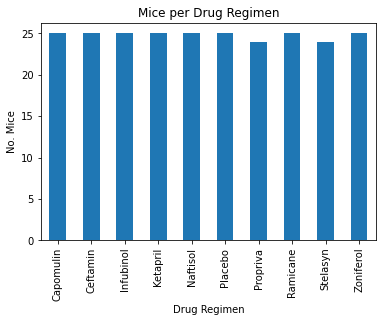

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
bar_mice_count=clean_data.groupby(["Drug Regimen"])["Mouse ID"].nunique()
bar_mice_count.plot(kind="bar",title="Mice per Drug Regimen",ylabel="No. Mice")



<function matplotlib.pyplot.show(close=None, block=None)>

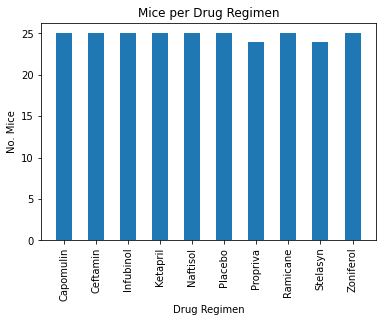

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count=clean_data.groupby(["Drug Regimen"])["Mouse ID"].nunique()
x2_axis=clean_data.groupby(["Drug Regimen"])["Drug Regimen"].unique().index.values


plt.bar(x2_axis,mice_count,align="center",width=0.5,)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("No. Mice")
plt.title("Mice per Drug Regimen")
plt.show


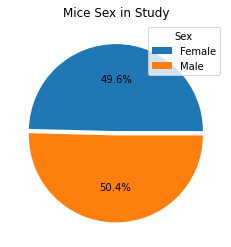

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex=clean_data.groupby(["Sex"])["Mouse ID"].nunique()
lebels=["Female","Male"]
explode=(0,0.05)
sex_pie=mice_sex.plot(kind='pie',title="Mice Sex in Study",ylabel=(''),xlabel=(''),explode=explode,autopct="%1.1f%%",labeldistance=None,
legend=True)
plt.legend(title="Sex")








<function matplotlib.pyplot.show(close=None, block=None)>

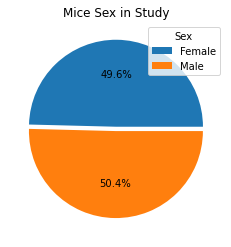

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count=clean_data.groupby(["Sex"])["Mouse ID"].nunique().values
labels=["Female","Male"]
explode=(0.05,0)
plt.pie(sex_count,labels=labels, explode= explode, autopct="%1.1f%%",labeldistance=None,)
plt.title("Mice Sex in Study")
plt.legend(title="Sex")

plt.show

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoints=[x for x in clean_data.groupby(["Mouse ID"])["Timepoint"].idxmax().values]
final_tumors=clean_data.loc[clean_data.index.isin(max_timepoints),['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Weight (g)','Timepoint']].reset_index(drop=True)
final_tumor_Capomulin=(final_tumors.loc[(final_tumors["Drug Regimen"]=="Capomulin")]).reset_index(drop=True)
final_tumor_Ramicane=(final_tumors.loc[(final_tumors["Drug Regimen"]=="Ramicane")]).reset_index(drop=True)
final_tumor_Infubinole=(final_tumors.loc[(final_tumors["Drug Regimen"]=="Infubinol")]).reset_index(drop=True)
final_tumor_Ceftamin=(final_tumors.loc[(final_tumors["Drug Regimen"]=="Ceftamin")]).reset_index(drop=True)
final_tumors.head(10)


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Weight (g),Timepoint
0,k403,Ramicane,22.050126,16,45
1,s185,Capomulin,23.343598,17,45
2,x401,Capomulin,28.484033,15,45
3,m601,Capomulin,28.430964,17,45
4,g791,Ramicane,29.128472,16,45
5,s508,Ramicane,30.276232,17,45
6,f966,Capomulin,30.485985,17,20
7,m546,Ramicane,30.564625,16,45
8,z578,Ramicane,30.638696,16,45
9,j913,Ramicane,31.560470,17,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

    

In [17]:
Capomulin_quartiles=final_tumor_Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq=Capomulin_quartiles[0.25]
Capomulin_upperq=Capomulin_quartiles[0.75]
Capomulin_iqr=Capomulin_upperq-Capomulin_lowerq
Capomulin_lower_bound= Capomulin_lowerq-(1.5*Capomulin_iqr)
Capomulin_upper_bound= Capomulin_upperq+(1.5*Capomulin_iqr)
Capomulin_outliers=final_tumor_Capomulin.loc[(final_tumor_Capomulin["Tumor Volume (mm3)"] > Capomulin_upper_bound) | (final_tumor_Capomulin["Tumor Volume (mm3)"] < Capomulin_lower_bound)]
print(f"For mice treated with Capomulin, final tumor sizes above {round(Capomulin_upper_bound,2)}mm3 or below {round(Capomulin_lower_bound,2)}mm3 are considered outliers")
if len(Capomulin_outliers) == 0:
    print("No mice treated with Capomulin had a final tumor size considered an outlier")
elif len(Capomulin_outliers) == 1:
    print("One mouse a had final tumor size considered an outlier:")
    for x in Capomulin_outliers.index:
        print("Mouse:", Capomulin_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", round(Capomulin_outliers["Tumor Volume (mm3)"][x],2))
else:
    print(f"{len(Capomulin_outliers)} mice had a final tumor sizes considered outliers. They were:")
    for x in Capomulin_outliers.index:
        print("Mouse:", Capomulin_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", round(Capomulin_outliers["Tumor Volume (mm3)"][x],2))

Capomulin_max=round(final_tumor_Capomulin["Tumor Volume (mm3)"].max(),2)
Capomulin_min=round(final_tumor_Capomulin["Tumor Volume (mm3)"].min(),2)

print(f"Maximum final tumor size (Capomulin)(mm3):{Capomulin_max}")
print(f"Minimum final tumor size (Capomulin)(mm3):{Capomulin_min}")


For mice treated with Capomulin, final tumor sizes above 51.83mm3 or below 20.7mm3 are considered outliers
No mice treated with Capomulin had a final tumor size considered an outlier
Maximum final tumor size (Capomulin)(mm3):47.69
Minimum final tumor size (Capomulin)(mm3):23.34


In [18]:
Ramicane_quartiles=final_tumor_Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_lowerq=Ramicane_quartiles[0.25]
Ramicane_upperq=Ramicane_quartiles[0.75]
Ramicane_iqr=Ramicane_upperq-Ramicane_lowerq
Ramicane_lower_bound= Ramicane_lowerq-(1.5*Ramicane_iqr)
Ramicane_upper_bound= Ramicane_upperq+(1.5*Ramicane_iqr)
Ramicane_outliers=final_tumor_Ramicane.loc[(final_tumor_Ramicane["Tumor Volume (mm3)"] > Ramicane_upper_bound) | (final_tumor_Ramicane["Tumor Volume (mm3)"] < Ramicane_lower_bound)]
print(f"For mice treated with Ramicane, final tumor sizes above {round(Ramicane_upper_bound,2)}mm3 or below {round(Ramicane_lower_bound,2)}mm3 are considered outliers")
if len(Ramicane_outliers) == 0:
    print("No mice treated with Ramicane had a final tumor size considered an outlier")
elif len(Ramicane_outliers) == 1:
    print("One mouse a had final tumor size considered an outlier:")
    for x in Ramicane_outliers.index:
        print("Mouse:", Ramicane_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", Ramicane_outliers["Tumor Volume (mm3)"][x])
else:
    print(f"{len(Ramicane_outliers)} mice had a final tumor sizes considered outliers. They were:")
    for x in Ramicane_outliers.index:
        print("Mouse:", Ramicane_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", Ramicane_outliers["Tumor Volume (mm3)"][x])

Ramicane_max=final_tumor_Ramicane["Tumor Volume (mm3)"].max()
Ramicane_min=final_tumor_Ramicane["Tumor Volume (mm3)"].min()

print(f"Maximum final tumor size (Ramicane)(mm3):{round(Ramicane_max,2)}")
print(f"Minimum final tumor size (Ramicane)(mm3):{round(Ramicane_min,2)}")

For mice treated with Ramicane, final tumor sizes above 54.31mm3 or below 17.91mm3 are considered outliers
No mice treated with Ramicane had a final tumor size considered an outlier
Maximum final tumor size (Ramicane)(mm3):45.22
Minimum final tumor size (Ramicane)(mm3):22.05


In [19]:
Infubinole_quartiles=final_tumor_Infubinole["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinole_lowerq=Infubinole_quartiles[0.25]
Infubinole_upperq=Infubinole_quartiles[0.75]
Infubinole_iqr=Infubinole_upperq-Infubinole_lowerq
Infubinole_lower_bound= Infubinole_lowerq-(1.5*Infubinole_iqr)
Infubinole_upper_bound= Infubinole_upperq+(1.5*Infubinole_iqr)
Infubinole_outliers=final_tumor_Infubinole.loc[(final_tumor_Infubinole["Tumor Volume (mm3)"] > Infubinole_upper_bound) | (final_tumor_Infubinole["Tumor Volume (mm3)"] < Infubinole_lower_bound)]
print(f"For mice treated with Infubinole, final tumor sizes above {round(Infubinole_upper_bound,2)}mm3 or below {round(Infubinole_lower_bound,2)}mm3 are considered outliers")
if len(Infubinole_outliers) == 0:
    print("No mice treated with Infubinole had a final tumor size considered an outlier")
elif len(Infubinole_outliers) == 1:
    print("One mouse a had final tumor size considered an outlier:")
    for x in Infubinole_outliers.index:
        print("Mouse:", Infubinole_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", round(Infubinole_outliers["Tumor Volume (mm3)"][x],2))
else:
    print(f"{len(Infubinole_outliers)} mice had a final tumor sizes considered outliers. They were:")
    for x in Infubinole_outliers.index:
        print("Mouse:", Infubinole_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", round(Infubinole_outliers["Tumor Volume (mm3)"][x],2))

Infubinole_max=round(final_tumor_Infubinole["Tumor Volume (mm3)"].max(),2)
Infubinole_min=round(final_tumor_Infubinole["Tumor Volume (mm3)"].min(),2)

print(f"Maximum final tumor size (Infubinole)(mm3):{Infubinole_max}")
print(f"Minimum final tumor size (Infubinole)(mm3):{Infubinole_min}")

For mice treated with Infubinole, final tumor sizes above 82.74mm3 or below 36.83mm3 are considered outliers
One mouse a had final tumor size considered an outlier:
Mouse: c326 -- Tumor Volume(mm3):  36.32
Maximum final tumor size (Infubinole)(mm3):72.23
Minimum final tumor size (Infubinole)(mm3):36.32


In [20]:
Ceftamin_quartiles=final_tumor_Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq=Ceftamin_quartiles[0.25]
Ceftamin_upperq=Ceftamin_quartiles[0.75]
Ceftamin_iqr=Ceftamin_upperq-Ceftamin_lowerq
Ceftamin_lower_bound= Ceftamin_lowerq-(1.5*Ceftamin_iqr)
Ceftamin_upper_bound= Ceftamin_upperq+(1.5*Ceftamin_iqr)
Ceftamin_outliers=final_tumor_Ceftamin.loc[(final_tumor_Ceftamin["Tumor Volume (mm3)"] > Ceftamin_upper_bound) | (final_tumor_Ceftamin["Tumor Volume (mm3)"] < Ceftamin_lower_bound)]
print(f"For mice treated with Ceftamin, final tumor sizes above {round(Ceftamin_upper_bound,2)}mm3 or below {round(Ceftamin_lower_bound,2)}mm3 are considered outliers")
if len(Ceftamin_outliers) == 0:
    print("No mice treated with Ceftamin had a final tumor size considered an outlier")
elif len(Ceftamin_outliers) == 1:
    print("One mouse a had final tumor size considered an outlier:")
    for x in Ceftamin_outliers.index:
        print("Mouse:", Ceftamin_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", round(Ceftamin_outliers["Tumor Volume (mm3)"][x],2))
else:
    print(f"{len(Ceftamin_outliers)} mice had a final tumor sizes considered outliers. They were:")
    for x in Ceftamin_outliers.index:
        print("Mouse:", Ceftamin_outliers["Mouse ID"][x], "-- Tumor Volume(mm3): ", round(Ceftamin_outliers["Tumor Volume (mm3)"][x],2))

Ceftamin_max=final_tumor_Ceftamin["Tumor Volume (mm3)"].max()
Ceftamin_min=final_tumor_Ceftamin["Tumor Volume (mm3)"].min()

print(f"Maximum final tumor size (Ceftamin)(mm3):{round(Ceftamin_max,2)}")
print(f"Minimum final tumor size (Ceftamin)(mm3):{round(Ceftamin_min,2)}")



For mice treated with Ceftamin, final tumor sizes above 87.67mm3 or below 25.36mm3 are considered outliers
No mice treated with Ceftamin had a final tumor size considered an outlier
Maximum final tumor size (Ceftamin)(mm3):68.92
Minimum final tumor size (Ceftamin)(mm3):45.0


Text(0, 0.5, 'Drug Regimen')

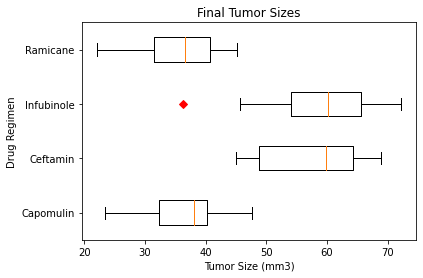

In [125]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data=(final_tumor_Capomulin["Tumor Volume (mm3)"],final_tumor_Ceftamin["Tumor Volume (mm3)"],
final_tumor_Infubinole["Tumor Volume (mm3)"],final_tumor_Ramicane["Tumor Volume (mm3)"])
labels=["Capomulin","Ceftamin","Infubinole","Ramicane"]
plt.boxplot(plot_data,labels=labels,vert=False,flierprops=dict(markerfacecolor='r',markeredgecolor='red',marker='D'))
plt.title("Final Tumor Sizes")
plt.xlabel("Tumor Size (mm3)")
plt.ylabel("Drug Regimen")




## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df=clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")]
capomulin_s185_df=capomulin_df.loc[(capomulin_df["Mouse ID"]=="s185")]
capomulin_s185_df=capomulin_s185_df.reset_index(drop=True)
capomulin_s185_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


(0.0, 45.0)

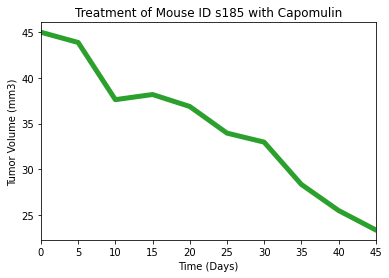

In [119]:
x_axis=capomulin_s185_df["Timepoint"].tolist()
y_axis=capomulin_s185_df["Tumor Volume (mm3)"].tolist()
plt.plot(x_axis,y_axis,linewidth=5,color='C2')
plt.title("Treatment of Mouse ID s185 with Capomulin")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

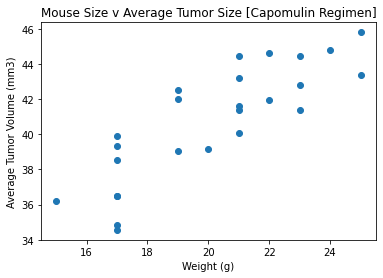

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean_tumor=capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_mean_tumor=capomulin_mean_tumor.sort_index()
mean_tumor=[x for x in capomulin_mean_tumor]

mice_weights=capomulin_df.drop_duplicates(subset="Mouse ID",keep='first')
mice_weights=(mice_weights.loc[:,["Weight (g)"]].set_index(mice_weights["Mouse ID"],drop=True)).sort_index()
weight=[x for x in mice_weights["Weight (g)"]]

plt.scatter(weight,mean_tumor)
plt.title("Mouse Size v Average Tumor Size [Capomulin Regimen]")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")




## Correlation and Regression

p value of less <.001 indicates that the data is significant
the r value of  0.84 indicates a strong positive linear association between the weight of the mouse and the average tumor size for mice treated with Capomulin
the regression model predicts and increase of 0.95mm3 in average tumor size for every 1g increase in mouse weight for mice treated with Capomulin.


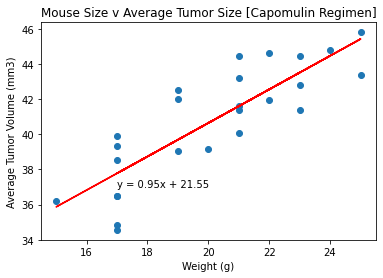

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(weight,mean_tumor)
(slope,intercept,rvalue,pvalue,stderr)=linregress(weight,mean_tumor)


reg_values=[x*slope+intercept for x in weight]

line_eq="y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,mean_tumor)
plt.title("Mouse Size v Average Tumor Size [Capomulin Regimen]")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight,reg_values,"r-")
plt.annotate(line_eq,(17,37))

print(f"p value of less <.001 indicates that the data is significant")
print(f"the r value of  {round(rvalue,2)} indicates a strong positive linear association between the weight of the mouse and the average tumor size for mice treated with Capomulin")
print(f"the regression model predicts and increase of 0.95mm3 in average tumor size for every 1g increase in mouse weight for mice treated with Capomulin.")




